In [1]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.compiler import transpile

import matplotlib.pyplot as plt


def visualize_result(res):
    n_qubit = len(list(res.keys())[0])
    for i in range(2 ** n_qubit):
        label ="{0:b}".format(i).rjust(n_qubit, '0')
        if not label in res.keys():
            res[label] = 0
    
    sorted_res = dict(sorted(res.items()))

    print(sorted_res)

    plt.title("Counts")
    plt.ylabel("Frequency")
    plt.xlabel("Measured State")
    plt.bar(sorted_res.keys(), sorted_res.values(), color='green')



{'00': 0, '01': 49943, '10': 50057, '11': 0}


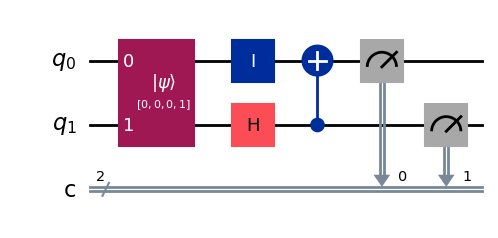

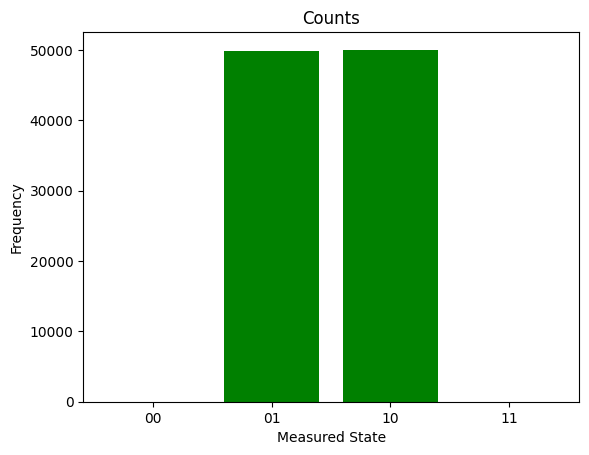

In [2]:
# 18.3

# circuit
qc = QuantumCircuit(2, 2)

qc.initialize([0, 0, 0, 1])

qc.id(0)
qc.h(1)
qc.cx(1, 0)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

{'00': 0, '01': 100000, '10': 0, '11': 0}


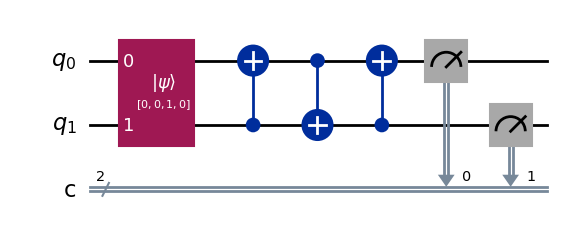

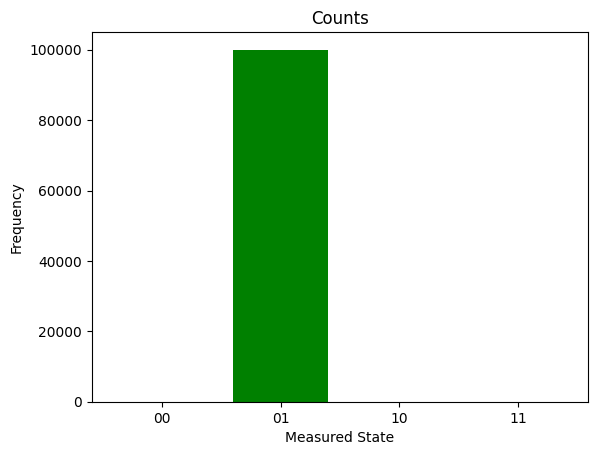

In [3]:
# 18.4

# circuit
qc = QuantumCircuit(2, 2)

qc.initialize([0, 0, 1, 0])

qc.cx(1, 0)
qc.cx(0, 1)
qc.cx(1, 0)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')


# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

{'00': 0, '01': 0, '10': 100000, '11': 0}


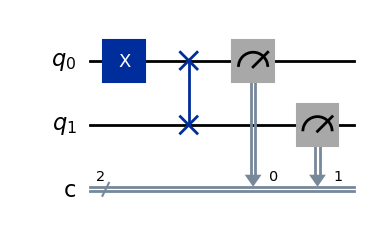

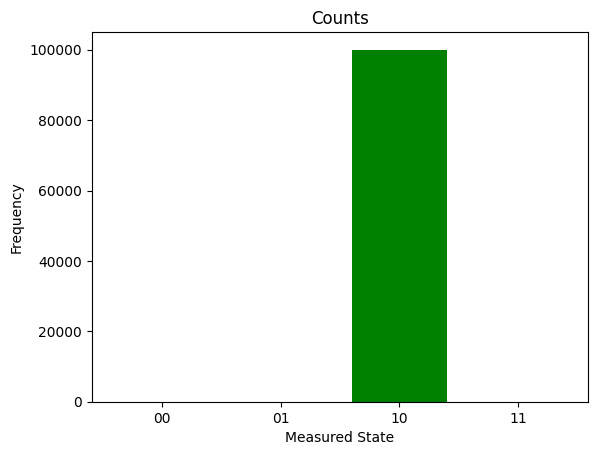

In [5]:
# 18.5

# circuit
qc = QuantumCircuit(2, 2)

#qc.initialize([0, 0, 1, 0])
qc.x(0)

qc.swap(0, 1)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')


# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')
